<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Entrega%202/Gr%C3%A1ficos/Modelagem_Media.Movel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 📦 Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# 📊 Leitura do arquivo já presente no Colab
df = pd.read_excel('/content/Dados_29-04-25.xlsx')  # Caminho padrão no Colab

O gráfico gerado a partir do modelo Naive apresenta uma linha horizontal que representa a previsão constante para os dias do período de teste, baseada unicamente no último valor registrado no período de treino. Esse comportamento é esperado, pois o modelo Naive assume que o valor mais recente disponível é a melhor estimativa para os valores futuros. Visualmente, é possível observar a linha preta correspondente aos dados de treino, a linha azul representando os valores reais durante o período de teste, e a linha vermelha tracejada mostrando a previsão gerada pelo modelo.

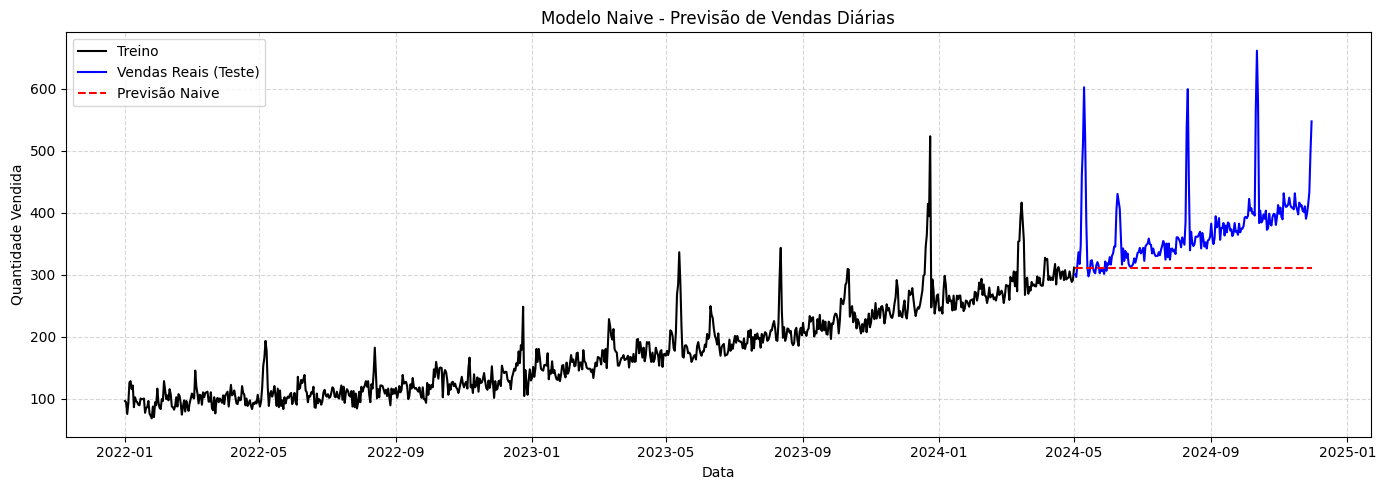

In [5]:
# Substitui os nomes das colunas por nomes padronizados
df.columns = ['Data', 'Dia_da_Semana', 'Vendas']

# Converte a coluna de data para datetime e ordena
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df.sort_values('Data').set_index('Data')
# Divide a base: 80% treino, 20% teste
tamanho_treino = int(len(df) * 0.8)
df_treino = df.iloc[:tamanho_treino]
df_teste = df.iloc[tamanho_treino:].copy()

# Modelo Naive: previsão constante igual ao último valor do treino
ultimo_valor = df_treino['Vendas'].iloc[-1]
df_teste['Naive'] = ultimo_valor

# Visualização
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df_treino.index, df_treino['Vendas'], label='Treino', color='black')
plt.plot(df_teste.index, df_teste['Vendas'], label='Vendas Reais (Teste)', color='blue')
plt.plot(df_teste.index, df_teste['Naive'], label='Previsão Naive', color='red', linestyle='--')
plt.title('Modelo Naive - Previsão de Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


O modelo cumulativo baseia-se na média aritmética acumulada de todos os valores observados até o período
𝑡
t para gerar uma previsão constante para os períodos futuros. No gráfico, essa previsão aparece como uma linha verde tracejada que representa o valor médio das vendas diárias observadas no conjunto de treino. Diferente do modelo Naive, que utiliza apenas o último valor disponível, o modelo cumulativo considera toda a trajetória histórica da série, suavizando flutuações pontuais e fornecendo uma estimativa mais estável do comportamento médio da demanda. Esse método é particularmente útil em séries temporais com padrão estacionário ou de crescimento lento, e serve como uma referência robusta para comparar modelos mais avançados.

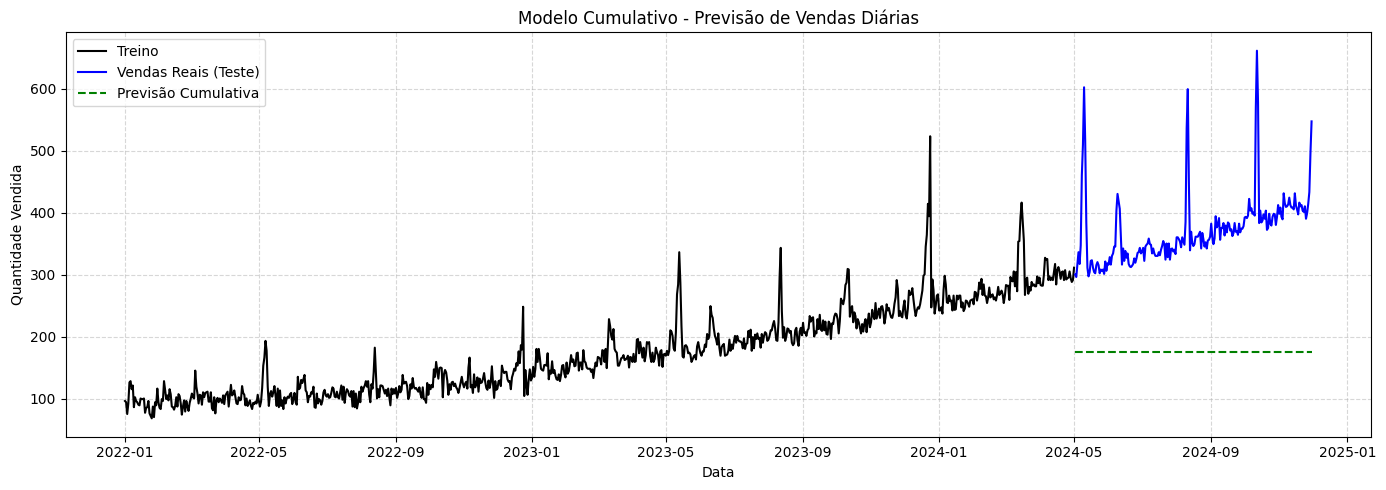

In [6]:
# Separar treino e teste (80% treino, 20% teste)
tamanho_treino = int(len(df) * 0.8)
df_treino = df.iloc[:tamanho_treino]
df_teste = df.iloc[tamanho_treino:].copy()

# Aplicar o modelo cumulativo
media_cumulativa = df_treino['Vendas'].expanding().mean().iloc[-1]
df_teste['Cumulativo'] = media_cumulativa  # previsão constante igual à média acumulada até o fim do treino

# Visualizar
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df_treino.index, df_treino['Vendas'], label='Treino', color='black')
plt.plot(df_teste.index, df_teste['Vendas'], label='Vendas Reais (Teste)', color='blue')
plt.plot(df_teste.index, df_teste['Cumulativo'], label='Previsão Cumulativa', color='green', linestyle='--')
plt.title('Modelo Cumulativo - Previsão de Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


A figura do gráfico apresenta o gráfico de linha das vendas diárias de camisetas básicas masculinas, abrangendo o período de janeiro de 2022 a novembro de 2024. A linha azul representa a quantidade de unidades vendidas por dia ao longo do tempo. É possível observar uma tendência clara de crescimento contínuo nas vendas, especialmente a partir do segundo semestre de 2023. O início da série é marcado por uma demanda mais baixa e estável, mas conforme o tempo avança, os volumes diários aumentam gradativamente, o que pode refletir a expansão da marca, maior presença no mercado ou campanhas promocionais eficazes.



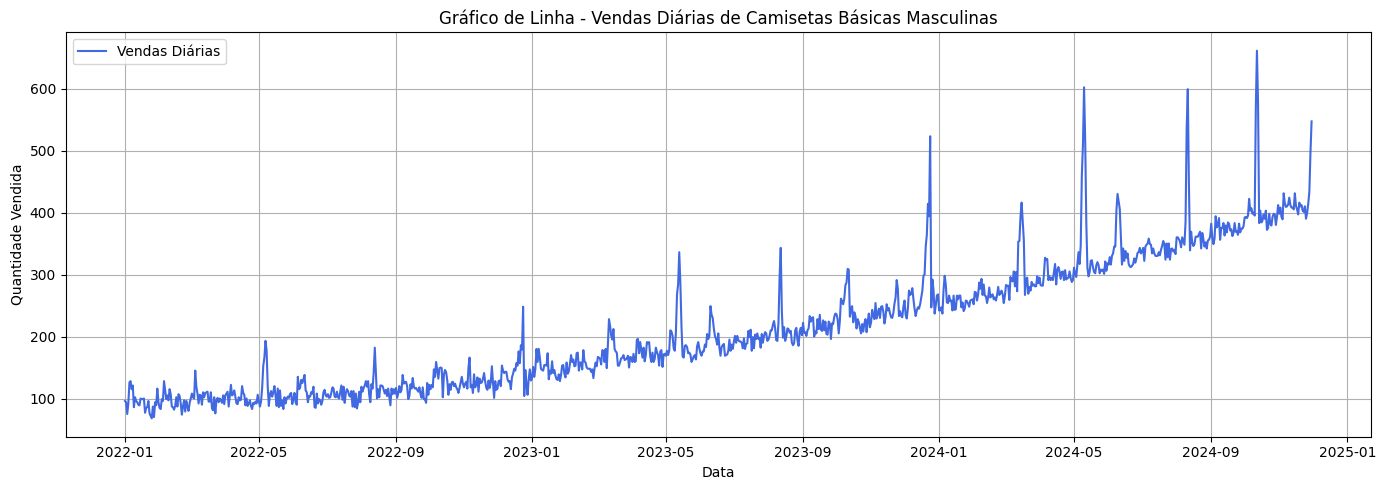

In [ ]:

# 📌 Renomear colunas (ajuste se necessário)
df.columns = ['Data', 'Dia_da_Semana', 'Vendas']

# 🕒 Converter coluna de datas
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)

# 📈 Plotar gráfico de linha
plt.figure(figsize=(14, 5))
plt.plot(df['Data'], df['Vendas'], color='royalblue', label='Vendas Diárias')
plt.title('Gráfico de Linha - Vendas Diárias de Camisetas Básicas Masculinas')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


A imagem do código abaixo apresenta a série temporal das vendas diárias de camisetas básicas masculinas, acompanhada de três curvas de médias móveis com diferentes janelas de suavização: 7, 30 e 365 dias. A linha azul clara representa as vendas reais registradas diariamente entre 2022 e o final de 2024. A linha laranja (média móvel de 7 dias) revela as oscilações de curto prazo, como variações semanais e promoções pontuais. A linha verde (média móvel de 30 dias) suaviza o comportamento mensal da série, destacando uma tendência de crescimento consistente e progressiva ao longo do tempo. Já a linha vermelha (média móvel de 365 dias) evidencia a tendência de longo prazo da série, revelando de forma clara o movimento de alta sustentada das vendas, possivelmente impulsionado pela consolidação da marca no mercado, aumento da base de clientes e maior frequência de campanhas promocionais. Essa combinação de curvas permite visualizar tanto o comportamento sazonal quanto estrutural da demanda, o que é fundamental para decisões estratégicas em negócios de moda com alta volatilidade, como o fast fashion.

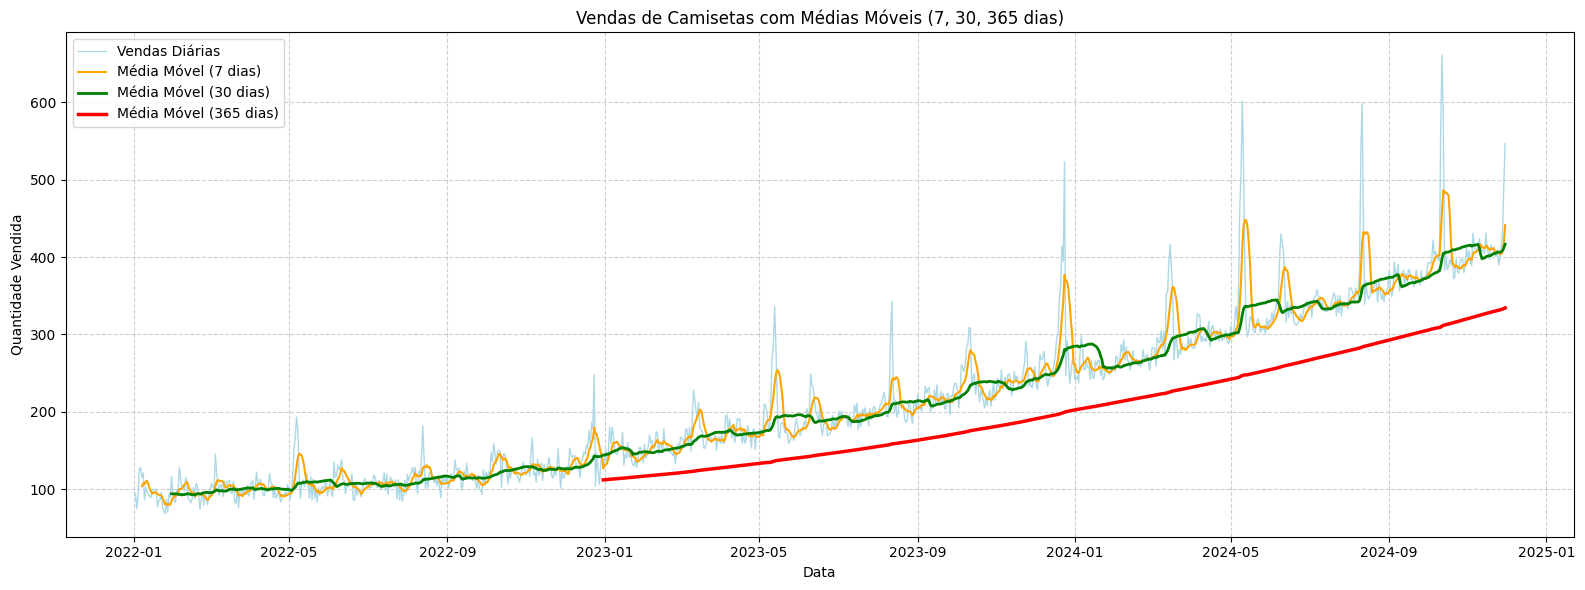

In [ ]:
# 📦 Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# 📊 Carregar a planilha local (ajuste o caminho se necessário)
df = pd.read_excel('/content/Dados_29-04-25.xlsx')

# 🧹 Organizar colunas
df.columns = ['Data', 'Dia_da_Semana', 'Vendas']
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df[['Data', 'Vendas']].dropna().sort_values('Data')

# 📈 Calcular médias móveis
df['MM_7'] = df['Vendas'].rolling(window=7).mean()
df['MM_30'] = df['Vendas'].rolling(window=30).mean()
df['MM_365'] = df['Vendas'].rolling(window=365).mean()

# 🎨 Plotar gráfico
plt.figure(figsize=(16, 6))
plt.plot(df['Data'], df['Vendas'], color='lightblue', linewidth=1, label='Vendas Diárias')
plt.plot(df['Data'], df['MM_7'], color='orange', linewidth=1.5, label='Média Móvel (7 dias)')
plt.plot(df['Data'], df['MM_30'], color='green', linewidth=2, label='Média Móvel (30 dias)')
plt.plot(df['Data'], df['MM_365'], color='red', linewidth=2.5, label='Média Móvel (365 dias)')

# 🎯 Personalização do gráfico
plt.title('Vendas de Camisetas com Médias Móveis (7, 30, 365 dias)')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
